<a href="https://colab.research.google.com/github/KattaLasya/AIML-2025/blob/main/AIML-LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB
Feature set size: (3000, 6)
Variable set size: (3000,)


,median_house_value
0,344700.0
1,176500.0
2,270500.0
3,330000.0
4,81700.0


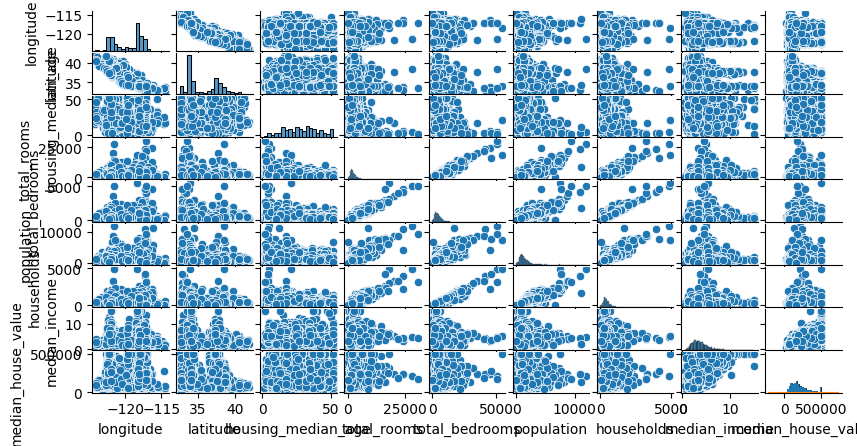

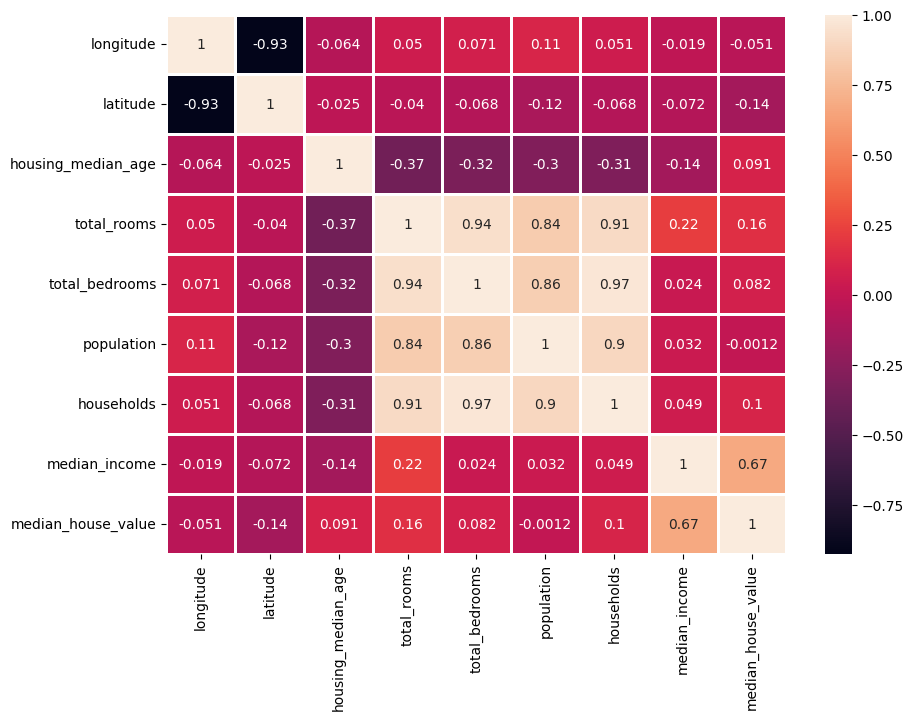

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv("/content/sample_data/california_housing_test.csv")
df.head()
df.info(verbose=True)
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])
df.columns
sns.pairplot(df)
df['median_house_value'].plot.hist(bins=25,figsize=(8,4))
df['median_house_value'].plot.density()
df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)
## Y = MX +C where Y is dependent, X is independent features
## M is slope, C is intercept
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column, len_feature
X = df[l_column[2:len_feature-1]]
y = df[l_column[len_feature-1]]
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)
X.head()
y.head()

Part 2

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=123)
y_train.shape, y_test.shape, X_train.shape, X_test.shape
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable
print("The intercept term of the linear model:", lm.intercept_)
print("The coefficients of the linear model:", lm.coef_)
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

Training feature set size: (2400, 6)
Test feature set size: (600, 6)
Training variable set size: (2400,)
Test variable set size: (600,)
The intercept term of the linear model: -45753.352219958586
The coefficients of the linear model: [ 1.99909081e+03 -2.24723979e+01  1.21014447e+02 -4.05798768e+01
  1.36899781e+02  4.71815831e+04]


,Coefficients
housing_median_age,1999.090808
total_rooms,-22.472398
total_bedrooms,121.014447
population,-40.579877
households,136.899781
median_income,47181.583105


Part 3

In [6]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[
        list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)

#cdf['Standard Error']=se
#cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
#cdf
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['Price'])
ax0.set_title(l[0]+" vs. Price", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['Price'])
ax1.set_title(l[1]+" vs. Price",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['Price'])
ax2.set_title(l[2]+" vs. Price",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['Price'])
ax3.set_title(l[3]+" vs. Price",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['Price'])
ax4.set_title(l[4]+" vs. Price",fontdict={'fontsize':20})
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.histplot([y_test-predictions])

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------


KeyError: 't-statistic'